In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.columns = ["labels", "mail"]

In [7]:
df.head()

,labels,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


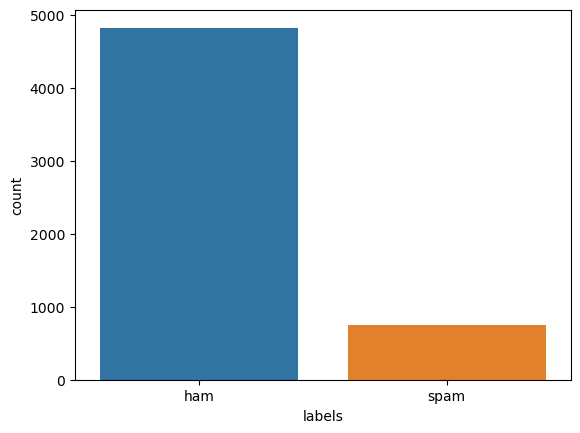

In [8]:
sns.countplot(x="labels", data=df)
plt.show()

In [9]:
df["coded_label"] = df["labels"].map({"ham":0, "spam":1})

# Exploratory Data Analysis

In [10]:
#1. WORD-COUNT
df['word_count'] = df['mail'].apply(lambda x: len(str(x).split()))
# Average number of words per sentence in "spam" mail and "ham" mail
print(df[df['coded_label']==1]['word_count'].mean()) 
print(df[df['coded_label']==0]['word_count'].mean())

23.85140562248996
14.20062176165803


In [11]:
#2. CHARACTER-COUNT
df['char_coun'] = df['mail'].apply(lambda x: len(str(x)))
print(df[df['coded_label']==1]['char_coun'].mean()) #Spam mails
print(df[df['coded_label']==0]['char_coun'].mean()) #Ham mails

138.8661311914324
71.02362694300518


In [12]:
#3. UNIQUE WORD-COUNT
df['unique_word_count'] = df['mail'].apply(lambda x: len(set(str(x).split())))
print(df[df['coded_label']==1]['unique_word_count'].mean())#Spam mails
print(df[df['coded_label']==0]['unique_word_count'].mean())#Ham mails

22.746987951807228
13.179481865284973


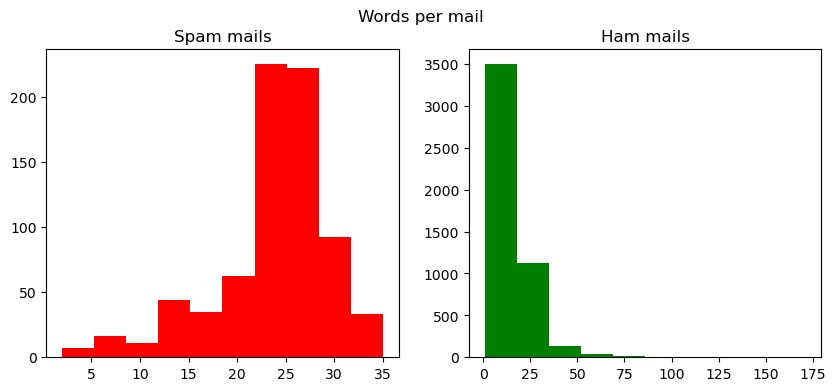

In [13]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['coded_label']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Spam mails')
train_words=df[df['coded_label']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Ham mails')
fig.suptitle('Words per mail')
plt.show()

In [14]:
df

,labels,mail,coded_label,word_count,char_coun,unique_word_count
0,ham,"Go until jurong point, crazy.. Available only ...",0,20,111,20
1,ham,Ok lar... Joking wif u oni...,0,6,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,155,24
3,ham,U dun say so early hor... U c already then say...,0,11,49,10
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13,61,12
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,30,161,26
5568,ham,Will Ì_ b going to esplanade fr home?,0,8,37,8
5569,ham,"Pity, * was in mood for that. So...any other s...",0,10,57,10
5570,ham,The guy did some bitching but I acted like i'd...,0,26,125,26


In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

In [20]:
def preprocess_sentences(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
      
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)

    finalsent = ' '.join(temp_sent)
    
    return finalsent


df["clean_mail"]= df["mail"].apply(preprocess_sentences)

In [21]:
# visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['clean_mail']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

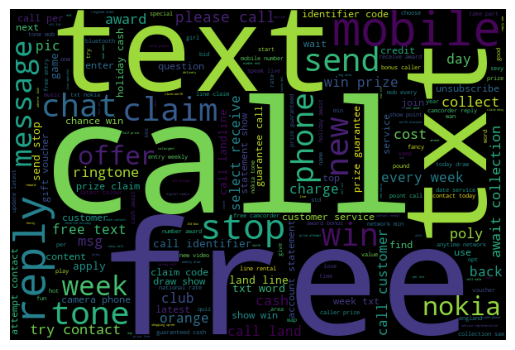

In [22]:
visualize('spam')

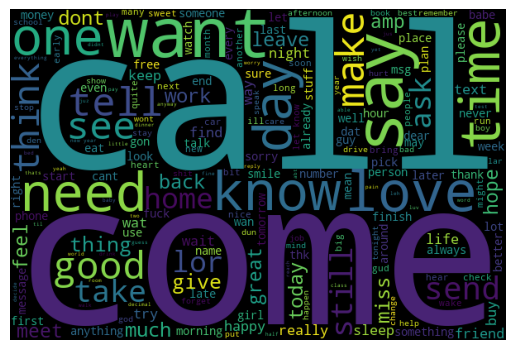

In [23]:
visualize('ham')

In [24]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

X_train, X_test, y_train, y_test = train_test_split(df["clean_mail"],
                                                  df["coded_label"],
                                                  test_size=0.2,
                                                  shuffle=True, random_state = 124)

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True, min_df=0.0004, max_df=0.5)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
X_train_vectors_tfidf

<4457x2527 sparse matrix of type '<class 'numpy.float64'>'
	with 28239 stored elements in Compressed Sparse Row format>

In [26]:
vocab = tfidf_vectorizer.get_feature_names()

print(vocab)

['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'abt', 'abta', 'aburo', 'acc', 'accept', 'access', 'accident', 'accidentally', 'account', 'ache', 'aco', 'across', 'act', 'action', 'activate', 'activity', 'actual', 'actually', 'adam', 'add', 'addict', 'address', 'admin', 'admirer', 'admit', 'adore', 'adult', 'advance', 'adventure', 'advice', 'advise', 'aeronautics', 'aeroplane', 'affair', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'age', 'agent', 'ago', 'agree', 'aha', 'ahead', 'ahmad', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aka', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'allah', 'allow', 'almost', 'alone', 'along', 'already', 'alright', 'alrite', 'also', 'always', 'amazing', 'american', 'among', 'amongst', 'amount', 'amp', 'amt', 'amuse', 'andros', 'angry', 'anna', 'anniversary', 'announcement', 'another', 'ans', 'ansr', 'answer', 'anthony', 'anti', 'anybody', 'anymore', 'anyone', 'anythin', 'an

C:\Users\prajj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Define classifiers
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
svm = SVC()


# Define parameter grids for each classifier
param_grid_lr = {'solver': ['liblinear', 'lbfgs', 'newton-cg'], 'C': [1, 5, 10], 'penalty': ['l1', 'l2']}
param_grid_nb = {}  
param_grid_svm = {'kernel': ['linear', 'rbf'], 'C': [1, 5, 10]}


# Define grid search for each classifier
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, refit=True, cv=5, verbose=3, n_jobs=-1)
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, refit=True, cv=5, verbose=3, n_jobs=-1)
grid_svm = GridSearchCV(svm, param_grid_svm, refit=True, cv=5, verbose=3, n_jobs=-1)


# Fit the models
for grid, name in zip([grid_lr, grid_nb, grid_svm],
                      ['Logistic Regression', 'Naive Bayes', 'SVM']):
    print(f"Performing Grid Search for {name}...")
    grid.fit(X_train_vectors_tfidf, y_train)
    print(f"Best parameters for {name}: {grid.best_params_}")

# Predictions and evaluation
for grid, name in zip([grid_lr, grid_nb, grid_svm],
                      ['Logistic Regression', 'Naive Bayes', 'SVM']):
    print(f"Evaluating {name}...")
    grid_predictions = grid.predict(X_test_vectors_tfidf)
    print(f"Classification report for {name}:")
    print(classification_report(y_test, grid_predictions))

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\prajj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Performing Grid Search for Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Naive Bayes: {}
Performing Grid Search for SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 5, 'kernel': 'linear'}
Evaluating Logistic Regression...
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       969
           1       0.96      0.70      0.81       146

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Evaluating Naive Bayes...
Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       969
           1       0.98      0.79      0.87

In [28]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(min_df=0.0004, max_df=0.5)

# Fit and transform the training data
X_train_vectors_count = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_vectors_count = count_vectorizer.transform(X_test)

In [29]:
vocab_count_vectorizer = count_vectorizer.get_feature_names()

print(vocab)

['aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'abt', 'abta', 'aburo', 'acc', 'accept', 'access', 'accident', 'accidentally', 'account', 'ache', 'aco', 'across', 'act', 'action', 'activate', 'activity', 'actual', 'actually', 'adam', 'add', 'addict', 'address', 'admin', 'admirer', 'admit', 'adore', 'adult', 'advance', 'adventure', 'advice', 'advise', 'aeronautics', 'aeroplane', 'affair', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'age', 'agent', 'ago', 'agree', 'aha', 'ahead', 'ahmad', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aka', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'allah', 'allow', 'almost', 'alone', 'along', 'already', 'alright', 'alrite', 'also', 'always', 'amazing', 'american', 'among', 'amongst', 'amount', 'amp', 'amt', 'amuse', 'andros', 'angry', 'anna', 'anniversary', 'announcement', 'another', 'ans', 'ansr', 'answer', 'anthony', 'anti', 'anybody', 'anymore', 'anyone', 'anythin', 'an

C:\Users\prajj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
# Define classifiers
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
svm = SVC()


# Define parameter grids for each classifier
param_grid_lr = {'solver': ['liblinear', 'lbfgs', 'newton-cg'], 'C': [1, 5, 10], 'penalty': ['l1', 'l2']}
param_grid_nb = {}  
param_grid_svm = {'kernel': ['linear', 'rbf'], 'C': [1, 5, 10]}


# Define grid search for each classifier
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, refit=True, cv=5, verbose=3, n_jobs=-1)
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, refit=True, cv=5, verbose=3, n_jobs=-1)
grid_svm = GridSearchCV(svm, param_grid_svm, refit=True, cv=5, verbose=3, n_jobs=-1)


# Fit the models
for grid, name in zip([grid_lr, grid_nb, grid_svm],
                      ['Logistic Regression', 'Naive Bayes', 'SVM']):
    print(f"Performing Grid Search for {name}...")
    grid.fit(X_train_vectors_count, y_train)
    print(f"Best parameters for {name}: {grid.best_params_}")

# Predictions and evaluation
for grid, name in zip([grid_lr, grid_nb, grid_svm],
                      ['Logistic Regression', 'Naive Bayes', 'SVM']):
    print(f"Evaluating {name}...")
    grid_predictions = grid.predict(X_test_vectors_count)
    print(f"Classification report for {name}:")
    print(classification_report(y_test, grid_predictions))

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\prajj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\prajj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Performing Grid Search for Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Naive Bayes: {}
Performing Grid Search for SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Evaluating Logistic Regression...
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       969
           1       0.97      0.82      0.88       146

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Evaluating Naive Bayes...
Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       969
           1       0.94      0.92      0.93

In [31]:
# Fit the best Naive Bayes model
best_model = grid_nb.best_estimator_
best_model.fit(X_train_vectors_count, y_train)

MultinomialNB()

In [32]:
# Predictions on train and test data
train_predictions = best_model.predict(X_train_vectors_count)
test_predictions = best_model.predict(X_test_vectors_count)

In [33]:
cm = confusion_matrix(y_train, train_predictions)
cm


array([[3819,   37],
       [  30,  571]], dtype=int64)

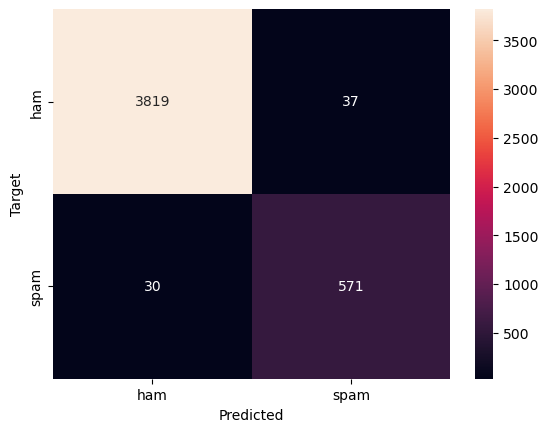

In [34]:
def plot_cm(cm):
    
    classes = ['ham', 'spam']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

In [36]:
cm = confusion_matrix(y_test, test_predictions)
cm

array([[961,   8],
       [ 12, 134]], dtype=int64)

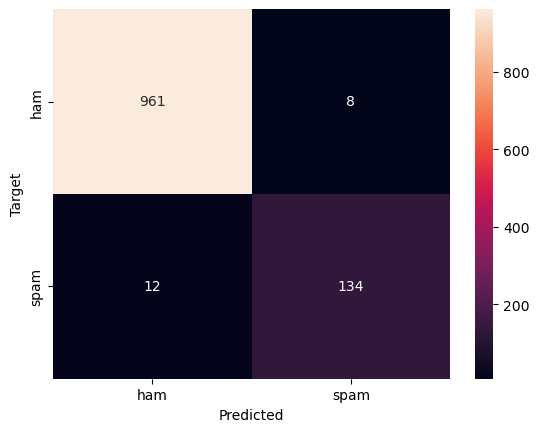

In [37]:
plot_cm(cm)

In [41]:
# see what we're getting wrong
X = count_vectorizer.transform(df['mail'])
df['predictions'] = best_model.predict(X)

In [43]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['coded_label'] == 1)]['mail']
for msg in sneaky_spam:
    print(msg)

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Are you unique enough? Find out from 30th August. www.areyouunique.co.uk
SMS. ac sun0819 posts HELLO:\You seem cool
08714712388 between 10am-7pm Cost 10p
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(å£1.50p. m)
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
0

In [45]:
# things that should not be spam
# perhaps some are mislabeled?
not_actually_spam = df[(df['predictions'] == 1) & (df['coded_label'] == 0)]['mail']
for msg in not_actually_spam:
    print(msg)

I am waiting machan. Call me once you free.
K..i deleted my contact that why?
Ok... Ur typical reply...
Finally the match heading towards draw as your prediction.
Customer place i will call you.
From here after The performance award is calculated every two month.not for current one month period..
Yes:)from last week itself i'm taking live call.
Are you free now?can i call now?
I called and said all to him:)then he have to choose this future.
Did u receive my msg?
So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint
Stop the story. I've told him i've returned it and he's saying i should not re order it.
Call me da, i am waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Yo, I'm at my parents' gettin cash. Good news: we picked up a downstem
No. She's currently in scotland for that.
Total video converter free download type this

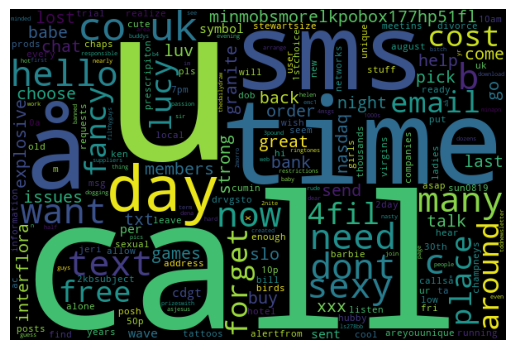

In [46]:
words = ''
for msg in df[(df['predictions'] == 0) & (df['coded_label'] == 1)]['mail']:
    msg = msg.lower()
    words += msg + ' '
wordcloud = WordCloud(width=600, height=400).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
These are the words with most frequency which found in mail

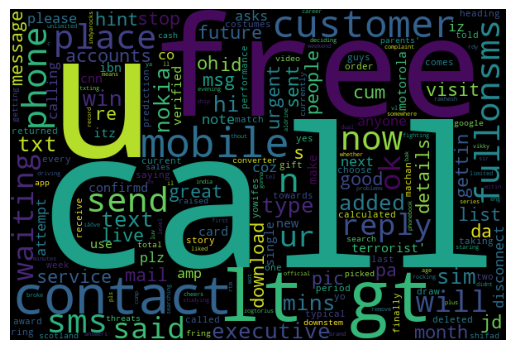

In [47]:
words = ''
for msg in df[(df['predictions'] == 1) & (df['coded_label'] == 0)]['mail']:
    msg = msg.lower()
    words += msg + ' '
wordcloud = WordCloud(width=600, height=400).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

After applying both TF-IDF and Count vectorization techniques to our dataset and evaluating various classification models such as logistic regression, Naive Bayes, and Support Vector Machines (SVM), we have reached the following conclusions:

When utilizing the count vectorization technique, the performance of the classification models, including logistic regression, Naive Bayes, and SVM, in distinguishing between ham and spam emails is noticeably improved. This improvement is evident from the classification report metrics.

If precision is our primary concern, the Support Vector Machine (SVM) classification model, in conjunction with count vectorization, demonstrates the highest precision among the three models, achieving a remarkable precision score of 98%.

Conversely, if we seek a more balanced model that performs well across all evaluation parameters, including precision, recall, and F1-score, the Multinomial Naive Bayes model, when used with count vectorization, emerges as a preferable choice.

In summary, selecting the appropriate combination of vectorization technique and classification model is crucial in achieving optimal performance for spam email classification. While SVM with count vectorization prioritizes precision, Multinomial Naive Bayes with count vectorization offers a more balanced performance across various evaluation metrics.